
    - 

In [1]:
#import astropy.convolution as conv
#dependencies:
%autosave 60
%matplotlib inline
import astropy.io.fits as fits
import astropy.units as u
#import photutils
import astropy.constants as c
import os
#import webbpsf
#from webbpsf import wfirst
import numpy as np
#import poppy.utils
#import poppy
import numpy as np


import glob
#from scipy.ndimage import rotate
#from scipy.ndimage import shift

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.visualization import quantity_support
quantity_support()
%matplotlib inline
import matplotlib as mpl
import importlib
from scipy.stats import lognorm
import matplotlib.pyplot as plt
import numpy as np

#print(webbpsf.__version__)
plt.rcParams.update({'image.origin': 'lower',
                     'font.size': '12',
                     'image.interpolation':"nearest",
                    'pdf.fonttype':42})
import astropy
import EXOSIMS,EXOSIMS.MissionSim,os.path


print("astropy:"+str(astropy.__version__))
print(mpl.__version__)
#print(EXOSIMS.__version__)
import sys
outdir="figs/"
print("python: "+sys.version)
EXOSIMS.__file__

Autosaving every 60 seconds
astropy:4.2
3.3.4
python: 3.9.2 (default, Mar  3 2021, 11:58:52) 
[Clang 10.0.0 ]


'/Users/edouglas/projects/WFIRST/EXOSIMS/EXOSIMS/__init__.py'

In [2]:
#convert HabEx target list to csv list of HIP values
import pandas as pd
mask=[]
HIP=pd.read_csv("HabEx-Master-Target-List-withCGI-Exozodi-Detection_limits_v5_LBTI_included.csv"
            ,delimiter=",")["HIP"].values
np.savetxt("hip.csv",HIP,fmt='HIP %s',delimiter=",")
#HIP.sort()
np.savetxt("hip_nums_only.csv",HIP,fmt='%s '+r'\\',delimiter=" ")

VMag=pd.read_csv("HabEx-Master-Target-List-withCGI-Exozodi-Detection_limits_v5_LBTI_included.csv"
            ,delimiter=",")["Vmag"].values
HabExDF=pd.read_csv("HabEx-Master-Target-List-withCGI-Exozodi-Detection_limits_v5_LBTI_included.csv"
            ,delimiter=",")
HabExDF=HabExDF.set_index("HIP")

In [3]:
HabExDF.loc[2021]


Star Number                                           6
Vmag                                               2.82
dist (pc)                                          7.46
Type                                               G2IV
 EEID (mas)                                         256
EEID (AU)                                          1.91
HZ inner edge (mas)                                 243
HZ outer edge (mas)                                 427
Snow line (mas)                                     845
IWA (AU)                                           1.12
L*/Lsun                                           3.645
Surface Brigthness Spectral Correction Factor      0.97
Exozodi Detection Limit at IWA (in zodi)         518.37
Time to SNR (hours)                                 NaN
Exozodi Level measured by LBTI at 11 microns        NaN
Unnamed: 16                                         NaN
Unnamed: 17                                         NaN
Unnamed: 18                                     

In [4]:
#scriptfile = os.path.join('Bijan-2020-Work/','wfirst_nemati2019_disks.json')
#sim = EXOSIMS.MissionSim.MissionSim(scriptfile)
#sim
# %load sampleScript_coron.json


## Setup EXOSIMS System

In [5]:
%%writefile sampleScript_coron.json
{
  "staticStars": true,
  "checkKeepoutEnd": false,
  "missionLife": 0.1,
  "missionPortion": 0.5,
  "OBduration": 50,
  "minComp": 0,
  "dMagLim": 30,
  "pupilDiam": 2.37,
  "ppFact": 0.125,
    "fillPhotometry":true,
    "explainFiltering":true,
    "catalogpath":"hip.csv",
  "scienceInstruments": [
    { "name": "imager",
      "QE": 0.72,
      "FoV": 9.5,
      "pixelNumber": 1024,
      "pixelSize": 1.3e-5,
      "sread": 0,
      "idark": 0.00027,
      "CIC": 0.01,
      "texp": 2,
      "ENF": 1
    }
  ],
  "starlightSuppressionSystems": [
    { "name": "HLC-565",
      "lam": 565,
      "BW": 0.10,
      "IWA": 0.15,
      "OWA": 0.42,
      "occ_trans": 0.2,
      "core_thruput": 0.01,
      "core_mean_intensity":  1.4e-11,
      "core_area": 0.0022,
      "core_platescale": 0.30
    },
     { "name": "HLC-565-Disk",
      "lam": 565,
      "BW": 0.10,
      "IWA": 0.15,
      "OWA": 0.42,
      "occ_trans": 0.23,
      "core_thruput": 0.12,
      "core_mean_intensity": 1.4e-11,
      "core_area": 0.0022,
      "core_platescale": 0.30
    },
      { "name": "HLC-565-TTR-DISK",
      "lam": 565,
      "BW": 0.10,
      "IWA": 0.28,
      "OWA": 0.42,
      "occ_trans": 0.05,
      "core_thruput": 0.12,
      "core_mean_intensity": 0.00000000121000,
      "core_area": 0.0022,
      "core_platescale": 0.30
    }
  ],
  "observingModes": [
    { "instName": "imager",
      "systName": "HLC-565-Disk",
      "detectionMode": true,
     "SNR":5
    }
  ],
  "modules": {
    "PlanetPopulation": "KeplerLike1",
    "StarCatalog": "HIPfromSimbad",
    "OpticalSystem": "Nemati",
    "ZodiacalLight": "Stark",
    "BackgroundSources": "GalaxiesFaintStars",
    "PlanetPhysicalModel": "FortneyMarleyCahoyMix1",
    "Observatory": "WFIRSTObservatoryL2",
    "TimeKeeping": " ",
    "PostProcessing": " ",
    "Completeness": " ",
    "TargetList": " ",
    "SimulatedUniverse": "KeplerLikeUniverse",
    "SurveySimulation": " ",
    "SurveyEnsemble": " "
  }
}

Overwriting sampleScript_coron.json


In [6]:
scriptfile = os.path.join('sampleScript_coron.json')
from importlib import reload
reload(EXOSIMS)
sim = EXOSIMS.MissionSim.MissionSim(scriptfile)
#sim.OpticalSystem?#


Imported SurveySimulation (prototype module) from EXOSIMS.Prototypes.SurveySimulation
Numpy random seed is: 576588911
Imported KeplerLikeUniverse (specific module) from EXOSIMS.SimulatedUniverse.KeplerLikeUniverse
Imported TargetList (prototype module) from EXOSIMS.Prototypes.TargetList
Imported HIPfromSimbad (specific module) from EXOSIMS.StarCatalog.HIPfromSimbad
['HIP 37279', 'HIP 97649', 'HIP 113368', 'HIP 57632', 'HIP 67927', 'HIP 2021', 'HIP 107556', 'HIP 102422', 'HIP 22449', 'HIP 17378', 'HIP 8102', 'HIP 95501', 'HIP 99240', 'HIP 3821', 'HIP 16537', 'HIP 98036', 'HIP 57757', 'HIP 27072', 'HIP 28103', 'HIP 109176', 'HIP 78072', 'HIP 27321', 'HIP 14632', 'HIP 50954', 'HIP 70497', 'HIP 59199', 'HIP 7513', 'HIP 12777', 'HIP 116771', 'HIP 102485', 'HIP 15510', 'HIP 92043', 'HIP 1599', 'HIP 64394', 'HIP 112447', 'HIP 61317', 'HIP 105858', 'HIP 17651', 'HIP 108870', 'HIP 67153', 'HIP 16852', 'HIP 19849', 'HIP 61174', 'HIP 77257', 'HIP 12843', 'HIP 71284', 'HIP 96100', 'HIP 34834', 'HI

In [7]:
OpSim=sim.OpticalSystem
Obs=sim.Observatory
TL=sim.TargetList
mode=sim.OpticalSystem.observingModes[0]

sim.TargetList.fillPhotometryVals()

print("mode should be HLC disk mode, and it is: "+mode["systName"])

mode should be HLC disk mode, and it is: HLC-565-Disk


In [8]:
#check post-processing gain
assert sim.PostProcessing.ppFact(0) ==1/8
f_pp=sim.PostProcessing.ppFact(0)

Check what stars EXOSIMS dropped:

HIP 107556 is a binary (http://simbad.u-strasbg.fr/simbad/sim-id?Ident=hip%20107556&submit=submit%20id)

In [9]:
TLHIP=[int(name[4:]) for name in TL.Name]
exclude=[]
for name in HIP:
    if np.where(TLHIP==name)[0] >=0:
        continue
    else:
        print(name)
        HIP=HIP[np.where(HIP!=name)]
        #VMag=VMag[np.where(HIP!=name)]
#VMag.sort()
HabExDF_NoBinary=HabExDF.drop(index= 107556)
HabExDF_NoBinary.shape



107556


<ipython-input-9-678540c8bea6>:4: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.where(TLHIP==name)[0] >=0:


(149, 20)

In [10]:
#drop the binaries
HabExDF_NoBinary=HabExDF.drop(index= 107556)
HabExDF_NoBinary.shape

(149, 20)

In [11]:
#define the reference star from Nemati spreadsheet


## Find Habitable Zone Boundaries

In [12]:
allstars=np.arange(sim.TargetList.nStars)
allstars.size


EEIDs=sim.TargetList.calc_EEID(allstars,arcsec=True)#

EEIDs_AU=sim.TargetList.calc_EEID(allstars,arcsec=False)#

innerHZs=sim.TargetList.calc_HZ_inner(allstars,arcsec=True)#

outerHZs=sim.TargetList.calc_HZ_outer(allstars,arcsec=True)#

innerHZ_AU=sim.TargetList.calc_HZ_inner(allstars,arcsec=False)

outerHZ_AU=sim.TargetList.calc_HZ_outer(allstars,arcsec=False)


IWA_AU=sim.TargetList.calc_IWA_AU(allstars)


#sim.TargetList.calc_HZ_inner?

In [13]:
outerHZs[outerHZ_AU>IWA_AU].size

74

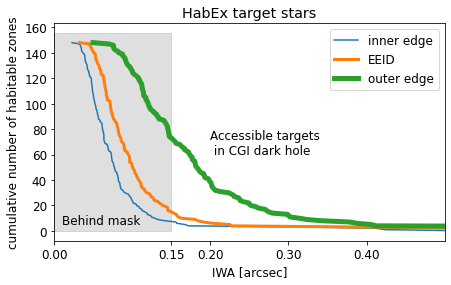

In [14]:

plt.figure(figsize=[7,4])

ax=plt.subplot(111)


inner_hist = plt.plot(np.sort(innerHZs)[::-1],np.arange(innerHZs.size),
                      #histtype="step",cumulative=-1,bins=np.arange(0.0,.5,.01),
                      label="inner edge")

inner_hist = plt.plot(np.sort(EEIDs)[::-1],np.arange(EEIDs.size),
                      #histtype="step",cumulative=-1,bins=np.arange(0.0,.5,.01),
                      linewidth=3,
                      label="EEID")
ax.plot(np.sort(outerHZs)[::-1],np.arange(outerHZs.size),
        #histtype="stepfilled",bins=inner_hist[1],alpha=.5,cumulative=-1,
                              linewidth=5,
        label="outer edge")
plt.fill_between([0,.15],[ax.get_ylim()[1],ax.get_ylim()[1]],alpha=0.25,color="gray")
plt.text(.2,60,s='Accessible targets \n in CGI dark hole',fontsize=12)
plt.text(.01,5,s='Behind mask',fontsize=12)


ax.set_ylabel("cumulative number of habitable zones")
ax.set_xlabel("IWA [arcsec]")
ax.set_xticks([0,.15,.2,.3,.4])
plt.xlim([.0,.5])
plt.legend()
#plt.grid(axis="x")iwa
plt.title("HabEx target stars")#sim.StarCatalog)#+", habitable zones after Kaltenegger et al 2018")
#plt.yscale('symlog', linthreshy=200)
#ax.set_yticks([0,25,50])#$,100,125,150])
#ticks=[0,25,50,75]#,100,100,125,150,175,200,500,1000]
#ax.set_yticks(ticks)
#ax.set_yticklabels([0,25,50,75,])#100,100,125,150,175,200,500,1000])
plt.savefig(outdir+'n_hz.pdf',bbox_inches="tight")

In [15]:
starmag=sim.TargetList.Vmag
resel_area=0.05**2 #as^2/resel


## Cumulative Exoposure Time Figure


In [16]:
IWA_AU

<Quantity [0.5271296 , 0.76942806, 1.15553505, 1.64998341, 1.7094017 ,
           1.11881847, 2.13980026, 1.21026306, 1.35611601, 0.54752519,
           2.32883077, 0.91625433, 0.89296346, 0.48240817, 2.05479455,
           1.63934426, 1.33904657, 2.23181076, 1.75891185, 1.6880486 ,
           2.91601868, 1.581111  , 2.43348484, 2.17959895, 2.24047809,
           2.02374516, 1.66907744, 2.05704889, 2.20167332, 0.90650876,
           2.88129072, 1.28799591, 1.36936283, 2.44458933, 1.2659297 ,
           1.38927484, 2.64410362, 0.54336015, 2.91036072, 2.09438696,
           0.74768221, 2.74223042, 1.81862268, 2.13310575, 2.37492085,
           0.86320996, 3.2140563 , 2.3839797 , 2.60010395, 1.89465709,
           1.28325777, 2.61551886, 1.7468266 , 3.25238514, 0.52297608,
           2.99700308, 1.37098975, 3.10045481, 3.21750326, 2.81162138,
           1.61759949, 1.91693287, 1.38312593, 2.69784193, 2.64783754,
           1.8175209 , 2.2886786 , 2.81214838, 2.25191417, 2.2672308 ,
      

/Users/edouglas/anaconda3/envs/python39/lib/python3.9/site-packages/astropy/units/quantity.py:1039: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = super().__getitem__(key)


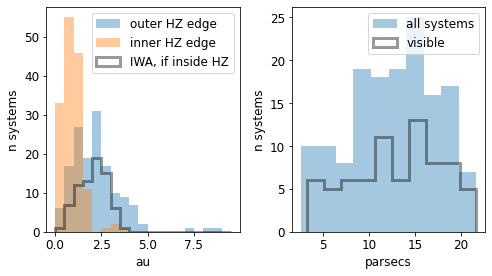

In [17]:
plt.figure(figsize=[7,4])
from importlib import reload


#drop stars where the IWA is larger then the HZ:
IWA_AU[IWA_AU>outerHZ_AU]=np.nan

#set to the inner edge of the HZ if the IWA is smaller

IWA_AU[IWA_AU<innerHZ_AU]=innerHZ_AU[IWA_AU<innerHZ_AU]
plt.subplot(121)
plt.hist(outerHZ_AU,alpha=.4,label='outer HZ edge',bins=np.arange(0,10,.5))
plt.hist(innerHZ_AU,alpha=.4,label='inner HZ edge',bins=np.arange(0,10,.5))
plt.hist(IWA_AU,alpha=.4,label="IWA, if inside HZ",bins=np.arange(0,10,.5),histtype="step",linewidth=3,
         color="black")
plt.xlabel("au")
plt.ylabel("n systems")
plt.legend()
plt.subplot(122)
plt.hist(sim.TargetList.dist,alpha=.4,label='all systems')#,bins=np.arange(0,10,.42))
plt.hist(sim.TargetList.dist[[IWA_AU>0]],alpha=.4,label='visible',
         histtype="step",linewidth=3,         color="black")
#,bins=np.arange(0,10,.42))

#lt.hist(innerHZ_AU,alpha=.4,label='inner HZ edge',bins=np.arange(0,10,.42))
#plt.hist(IWA_AU,alpha=.4,label="IWA, if inside HZ",bins=np.arange(0,10,.42),histtype="step",linewidth=3,
#         color="black")
plt.xlabel("parsecs")
plt.ylabel("n systems")
plt.legend()
plt.tight_layout()

plt.savefig(outdir+"visible"+mode["systName"]+".pdf")

In [18]:
sim.OpticalSystem.IWA#IWA.to(u.arcsec).value

<Quantity 0.15 arcsec>

In [19]:
#find median distance
np.median(sim.TargetList.dist[IWA_AU>0])


<Quantity 13.60264683 pc>

Text(0, 0.5, 'EEID (AU)')

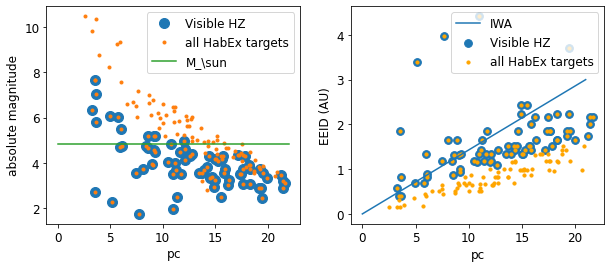

In [20]:
plt.figure(figsize=[10,4])
plt.subplot(121)
plt.plot(TL.dist[IWA_AU>0],TL.MV[IWA_AU>0],".",markersize=20,label="Visible HZ")
plt.plot(TL.dist,TL.MV,".",label="all HabEx targets")
plt.ylabel("M")
plt.plot([0,22],[4.830,4.83],label=r"M_\sun")
#plt.title(np.mean(TL.MV[IWA_AU>0]))
plt.ylabel("absolute magnitude")
#plt.plot(TL.dist,4.83+np.log10(TL.dist.value/10))
plt.legend()
plt.subplot(122)

scatter=plt.scatter(TL.dist.value[IWA_AU>0],
                    sim.TargetList.calc_EEID(allstars,arcsec=False)[IWA_AU>0],
                   #c=TL.stellarTeff(allstars).value[IWA_AU>0],#TL.stellarTeff(allstars).value,
                   s=60,#alpha=.8,#,1000/10**(TL.Vmag*.4),#,alpha=.5
                   cmap="viridis",
                label="Visible HZ"
                  #)
                   )

scatter=plt.scatter(TL.dist.value,
                    sim.TargetList.calc_EEID(allstars,arcsec=False).value,
                   #c=TL.stellarTeff(allstars).value[IWA_AU>0],#TL.stellarTeff(allstars).value,
                   s=10,#,alpha=.8,#,1000/10**(TL.Vmag*.4),#,alpha=.5
                   color="orange",
                    label="all HabEx targets"
                  #)
                  )
plt.legend()

#plt.ylabel(r"$r_s/r_{ez}$")
#plt.yscale("log")
plt.plot([0,21],[0,3],label="IWA")
plt.legend()


plt.xlabel("pc")
plt.ylabel("EEID (AU)")
#plt.savefig("WFIRST-CGI-disks-Uno/eeid.png")

In [21]:
#check exozodi surface brightness in magnitudes
assert TL.ZodiacalLight.magEZ ==22

In [22]:

alphaZ=2.34
#alphaZ=1
fEZ_inner = TL.ZodiacalLight.fEZ(TL.MV,90*u.deg*np.ones(allstars.size),innerHZ_AU,alpha=alphaZ,fbeta=1)
fEZ_EEID= TL.ZodiacalLight.fEZ(TL.MV,90*u.deg*np.ones(allstars.size),EEIDs_AU,alpha=alphaZ,fbeta=1)
fEZ_outerHZ = TL.ZodiacalLight.fEZ(TL.MV,90*u.deg*np.ones(allstars.size),outerHZ_AU,alpha=alphaZ,fbeta=1)
fEZ_IWA =   TL.ZodiacalLight.fEZ(TL.MV,90*u.deg*np.ones(allstars.size),IWA_AU,alpha=alphaZ,fbeta=1)
fEZ_outer = TL.ZodiacalLight.fEZ(TL.MV,90*u.deg*np.ones(allstars.size),IWA_AU,alpha=alphaZ,fbeta=1)






#fEZ_innerFlat = TL.ZodiacalLight.fEZ(TL.Vmag,60*u.deg*np.ones(allstars.size),innerHZ_AU,alpha=1,fbeta=1)
#fEZ_outerFlat = TL.ZodiacalLight.fEZ(TL.Vmag,60*u.deg*np.ones(allstars.size),outerHZ_AU,alpha=1,fbeta=1)
print(np.nanmean(fEZ_outer),fEZ_outer.size)
print(np.nanmean(fEZ_IWA),fEZ_outer.size)

1.0098951331240722e-09 1 / arcsec2 149
1.0098951331240722e-09 1 / arcsec2 149


<ipython-input-23-c8543222a1d0>:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=plt.subplot(111)


[Text(0, 19.0, ''),
 Text(0, 20.0, ''),
 Text(0, 21.0, ''),
 Text(0, 22.0, ''),
 Text(0, 23.0, ''),
 Text(0, 24.0, '')]

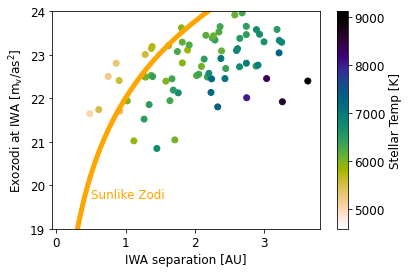

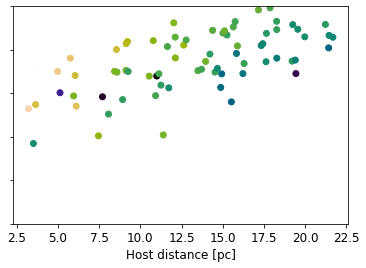

In [23]:
ax1=plt.subplot(111)
import cmasher



x_AU_range=np.arange(innerHZ_AU.min().value,np.nanmax(IWA_AU).value,np.nanmax(IWA_AU).value/allstars.size)*u.AU

#x_AU_pcrange=np.arange(1/TL.dist.min().value,np.nanmax(1/TL.dist).value,np.nanmax(1/TL.dist).value/allstars.size)*u.AU


y_fEZ=TL.ZodiacalLight.fEZ(TL.MV.min(),90*u.deg*np.ones(allstars.size),x_AU_range,alpha=alphaZ,fbeta=1,tau=1)

y_fEZmax=TL.ZodiacalLight.fEZ(TL.MV.max(),90*u.deg*np.ones(allstars.size),x_AU_range,alpha=alphaZ,fbeta=1,tau=1)

y_fEZ_M5=TL.ZodiacalLight.fEZ(4.84,90*u.deg*np.ones(allstars.size),x_AU_range,alpha=alphaZ,fbeta=1,tau=1)

#plt.plot(x_AU_range,-2.5*np.log10(y_fEZ.value))
#plt.plot(x_AU_range,-2.5*np.log10(y_fEZmax.value))


plt.plot(x_AU_range,-2.5*np.log10(y_fEZ_M5.value),linewidth=5,color="orange")
SB_IWA=-2.5*np.log10(fEZ_IWA.value)
plt.scatter(IWA_AU,SB_IWA,c=TL.stellarTeff(allstars),
            cmap=plt.get_cmap('cmr.rainforest_r') 
           )
lim1=plt.ylim([19,24])
plt.ylabel(r"Exozodi at IWA [m$_{\rm v}$/as$^2$]")
plt.text(.5,19.7, "Sunlike Zodi",color="orange")

ax1.set_xlabel("IWA separation [AU]")
plt.colorbar(label="Stellar Temp [K]")

plt.savefig(outdir+"AU_PC_temp.pdf",bbox_inches="tight")



plt.figure()
plt.scatter(TL.dist,-2.5*np.log10(fEZ_IWA.value),c=TL.stellarTeff(allstars),
            cmap=plt.get_cmap('cmr.rainforest_r') 
           )
ax2=plt.subplot(111)


#plt.plot((1/x_AU_range.value)[::-1],-2.5*np.log10(y_fEZ_M5.value),linewidth=5)


ax2.set_xlabel("Host distance [pc]")


#plt.colorbar(label="Stellar Temp [K]")
plt.ylim(lim1)
ax2.set_yticklabels("")

In [24]:
#use conservative max local zodi so we don't have to worry about observation timing:
fZMax = TL.ZodiacalLight.calcfZmax( allstars, 
                                Obs, 
                                TL,
                                sim.TimeKeeping,
                                mode, 
                                sim.SurveySimulation.cachefname)


Loading cached fZmax from /Users/edouglas/.EXOSIMS/cache/CompletenessTargetListNemati00659cc79e49e5782ac381ebf8eafe4e.fZmax


## Calculate detection limits given lognorm distribution from Ertel et al papers

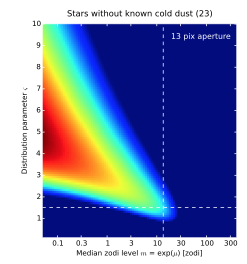
Ertel et al. - 2018 - The HOSTS survey - Exozodiacal dust measurements f.pdf

In [25]:
#s = 5 
m=13 #=exp(mu)=median of the fitted distribution (n_zodi...)

#m=np.log(m)
#
#loc=-10
s=1.5#|.5

mean, var, skew, kurt = lognorm.stats(s,scale=m, moments='mvsk')


In [26]:
'''
ax = plt.subplot(121)
rv = lognorm(s=s,scale=m) #lognorm.pdf(x, s, loc, scale) 

x = np.linspace(lognorm.ppf(0.05, s,
                            #loc=loc,
                           scale=m
                           ),
                lognorm.ppf(0.95, s,
                            #loc=loc,
                           scale=m
                           ), 100)

'''

'\nax = plt.subplot(121)\nrv = lognorm(s=s,scale=m) #lognorm.pdf(x, s, loc, scale) \n\nx = np.linspace(lognorm.ppf(0.05, s,\n                            #loc=loc,\n                           scale=m\n                           ),\n                lognorm.ppf(0.95, s,\n                            #loc=loc,\n                           scale=m\n                           ), 100)\n\n'

In [27]:
outerHZs

<Quantity [1.00782705, 1.39305471, 1.12829271, 0.89028502, 0.18519376,
           0.27944264, 0.07905676, 0.37843179, 0.12467119, 0.38723298,
           0.31352758, 0.2299764 , 0.4060797 , 0.3002941 , 0.10012032,
           0.2266999 , 0.34244799, 0.29913279, 0.30164316, 0.27197621,
           0.41278232, 0.19921681, 0.26094673, 0.1928656 , 0.32346316,
           0.1824131 , 0.23621308, 0.20356342, 0.24193029, 0.25168201,
           0.16941596, 0.27456657, 0.25860648, 0.18610037, 0.24939625,
           0.26999449, 0.20074625, 0.18093309, 0.22364107, 0.17384163,
           0.23060749, 0.23757303, 0.17268868, 0.19832521, 0.25013132,
           0.20131316, 0.20196336, 0.16244687, 0.20622776, 0.15166474,
           0.17686622, 0.23789772, 0.21211306, 0.19157162, 0.18761684,
           0.15583844, 0.17980289, 0.08297362, 0.18031861, 0.13110541,
           0.19284688, 0.20443951, 0.19191047, 0.09159195, 0.19752264,
           0.20172411, 0.17450404, 0.14168009, 0.164051  , 0.16080955,
      

In [28]:
TL.fillPhotometryVals()

#rates:


#C_ez=C_F0*fEZ*Omega*core_thruput
#cb is the background including detector noise
#csp is the speckles
cp,cb,csp, extra02as =  sim.OpticalSystem.Cp_Cb_Csp(TL,
                            allstars,
                            0*allstars*u.arcsec**(-2), #neglects local zodi
                            fEZ_outer,0*allstars,mode[ 'IWA']*np.ones(len(allstars)),mode,returnExtra=True)

cp,cb,csp, extraInner =  sim.OpticalSystem.Cp_Cb_Csp(TL,
                            allstars,
                            0*allstars*u.arcsec**(-2),
                            fEZ_inner,0*allstars,innerHZs,mode,returnExtra=True)
#run for outer HZ surface brightness:
cp,cbOuter,csp, extraOuter =  sim.OpticalSystem.Cp_Cb_Csp(TL,
                                                          allstars,
                                                          0*allstars*u.arcsec**(-2), #neglects local zodi
                                                          fEZ_outer,0*allstars,outerHZs,
                                                          mode,returnExtra=True)# speckle rate includes post processing, ["C_sr"] is the raw speckle rate!
#assume everything is at the IWA:
cp,cbIWA,csp, extraIWA =  sim.OpticalSystem.Cp_Cb_Csp(TL,
                                                          allstars,
                                                          0*allstars*u.arcsec**(-2), #neglects local zodi
                                                          fEZ_IWA,
                                                          0*allstars,
                                                          mode[ 'IWA']*np.ones(len(allstars)),
                                                          mode,returnExtra=True)
cp,cbOuter,csp, extraOuter = cp,cbOuter,csp, extraOuter
'''sim.OpticalSystem.Cp_Cb_Csp(TL,
                                                          allstars,
                                                          0*allstars*u.arcsec**(-2), #neglects local zodi
                                                          fEZ_outer,0*allstars,mode[ 'IWA']*np.ones(len(allstars)),
                                                          mode,returnExtra=True)'''

"sim.OpticalSystem.Cp_Cb_Csp(TL,\n                                                          allstars,\n                                                          0*allstars*u.arcsec**(-2), #neglects local zodi\n                                                          fEZ_outer,0*allstars,mode[ 'IWA']*np.ones(len(allstars)),\n                                                          mode,returnExtra=True)"

In [29]:
ref_star=[TL.Name=="HIP 2021"]
fEZ_outer[ref_star],fEZ_IWA[ref_star]

/Users/edouglas/anaconda3/envs/python39/lib/python3.9/site-packages/astropy/units/quantity.py:1039: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = super().__getitem__(key)


(<Quantity [3.89977181e-09] 1 / arcsec2>,
 <Quantity [3.89977181e-09] 1 / arcsec2>)

In [30]:
#-TL.starMag(allstars, mode["lam"])
print(extraIWA["C_sr"][ref_star],extraIWA["C_ez"][ref_star])#77
extraIWA["C_sr"][ref_star],77*extraIWA["C_ez"][ref_star],csp[ref_star] #77

[0.06389921] 1 / s [0.00833262] 1 / s


(<Quantity [0.06389921] 1 / s>,
 <Quantity [0.64161144] 1 / s>,
 <Quantity [0.0079874] 1 / s>)

/Users/edouglas/anaconda3/envs/python39/lib/python3.9/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


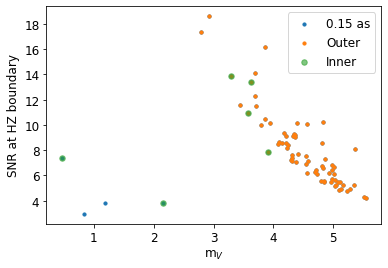

In [31]:
def snr(signal,noise,t):
    #print((noise*t))
    return (signal*t/np.sqrt(noise*t+signal*t)).decompose()
plt.scatter(starmag[allstars],snr(extraIWA["C_ez"],extraIWA["C_sr"],100*u.hour),s=10,label="0.15 as")

plt.scatter(starmag[allstars],snr(extraOuter["C_ez"],extraOuter["C_sr"],100*u.hour),s=10,label="Outer")

plt.scatter(starmag[allstars],snr(extraInner["C_ez"],extraInner["C_sr"],100*u.hour),s=30,
            alpha=.6,
            label="Inner")
plt.ylabel("SNR at HZ boundary")
plt.xlabel(r"m$_{V}$")
plt.legend()
#print(extra02as)

In [32]:
(extraIWA["C_sr"]/extraIWA["C_ez"])[TL.Vmag<3]

<Quantity [ 62.65915924, 129.06660473,  85.12387787,  53.38945052,
             8.83440273,   7.66856518]>

Text(0.5, 0, 'm$_v$')

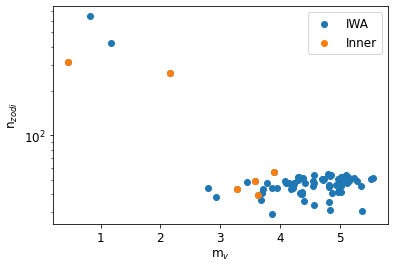

In [33]:

assert mode["SNR"]==5

SNR=5#mode["SNR"]

#background shouldn't be included here because this is the infinite exposure time case
nz_critIWA=SNR*(extraIWA["C_sr"])/extraIWA["C_ez"]
nz_critInner=SNR*(extraInner["C_sr"])/extraInner["C_ez"]


plt.scatter(starmag,nz_critIWA,label="IWA")
plt.scatter(starmag,nz_critInner,
                        label="Inner")


plt.yscale("log")
plt.legend()
plt.ylabel("n$_{zodi}$")
plt.xlabel("m$_v$")


In [34]:
HabExDF_NoBinary["EXOSIMS_nz_critOuter"] =nz_critIWA

In [35]:
HabExDF_NoBinary.to_latex(outdir+"HabExDF_NoBinary.tex",
                          header=False,
                          na_rep='Below Threshold', 
                          columns=["EXOSIMS_nz_critOuter"])
#HabExDF_NoBinary[r"\\"]=r"\\"
#HabExDF_NoBinary.to_csv("WFIRST-CGI-disks-Uno/HabExDF_NoBinary.csv",columns=["EXOSIMS_nz_critOuter",r"\\"])

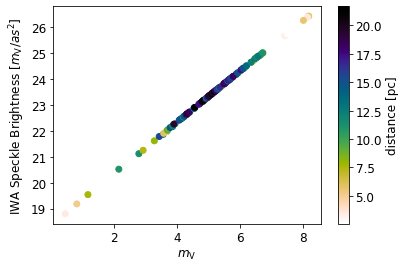

In [36]:

plt.scatter(TL.Vmag,-2.5*np.log10(extraIWA["C_sr"].value/extraIWA["C_F0"].value/.05**2),
            c=TL.dist,#"-2.5*np.log10(extraOuter["C_sr"].value/extraOuter["C_F0"].value/.05**2)-SB_IWA,
            cmap=plt.get_cmap('cmr.rainforest_r') 
           )
plt.xlabel("")
plt.ylabel(r"IWA Speckle Brightness [$m_{\rm V}/as^2$]")
plt.xlabel(r"$m_{\rm V}$")
plt.colorbar(label="distance [pc]")
plt.savefig(outdir+"IWA_Speckles_vs_mv_"+mode["systName"]+".pdf",bbox_inches="tight")

In [37]:
#sim.OpticalSystem.calc_intTime?

def zodi_mag_per_resel(Zodis):
    return (-2.5*np.log10(fEZ_IWA.value)) - 2.5*np.log10(Zodis) - 2.5*np.log10(resel_area) - TL.Vmag




zIWA=zodi_mag_per_resel((nz_critIWA))

#plt.plot(zIWA)
#plt.plot(zodi_mag_per_resel(40))

No handles with labels found to put in legend.


Text(0, 0.5, 'n$_{zodi}$')

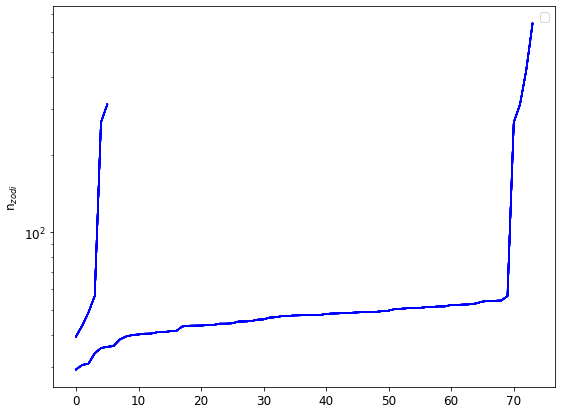

In [38]:
#assert mode["SNR"]==5
SNR=mode["SNR"]
plt.figure(figsize=[9,7])
b2=[]
ndet=[]
for i in range(100):
    draws1 = lognorm.rvs(s, scale=m, size=starmag.size)
    draws2 = lognorm.rvs(s, scale=3, size=starmag.size)
    ndet.append(nz_critIWA[nz_critIWA/draws1>1].size)

    nz1o_sorted=np.sort(nz_critIWA)
    nz1i_sorted=np.sort(nz_critInner)

    # nz1o_sorted2=np.sort(nz_critOuter2)
    #nz1i_sorted2=np.sort(nz_critInner2)
    plt.plot(nz1o_sorted,alpha=.1,color="blue")#,label="Outer")
    plt.plot(nz1i_sorted,alpha=.1,color="blue")#label="Inner")
    #plt.plot(nz1o_sorted2,alpha=.1,color="black")#,label="Outer")
    #plt.plot(nz1i_sorted2,alpha=.1,color="black")#label="Inner")

    b2.append(nz1i_sorted)

plt.yscale("log")
plt.legend()
plt.ylabel("n$_{zodi}$")
#plt.xlabel("m$_v$")



33

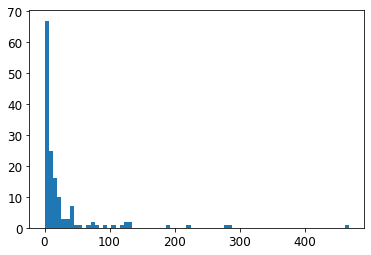

In [39]:
from scipy.stats.mstats import mquantiles
from astropy.visualization import hist

draws= lognorm.rvs(s, scale=50, size=starmag.size)
plt.hist(draws/5,bins="auto")
nz_critIWA[nz_critIWA<(draws)].size

In [40]:
#test that the scale is the median
np.median(lognorm.rvs(s, scale=10, size=starmag.size))


8.671558202022204

z=27. detectionNZ: 61, 95th quantile : 54 - 67, \sigma= 3.1
z=9. detectionNZ: 52, 95th quantile : 37 - 66, \sigma= 9.2
z=3. detectionNZ: 43, 95th quantile : 18 - 65, \sigma= 16
z=1. detectionNZ: 34, 95th quantile : 5 - 65, \sigma= 20


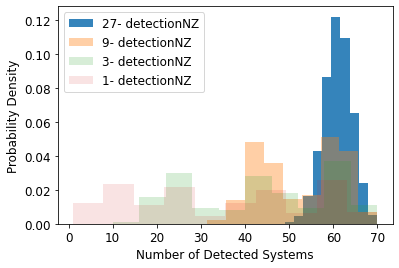

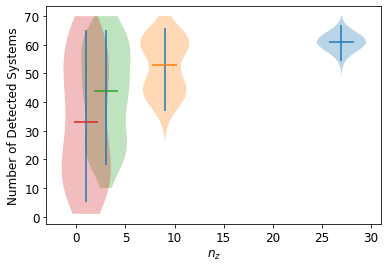

In [41]:
import scipy.stats
ndet={"detectionNZ":[],"nz_critIWA":[]}
zrange=[27,9,3,1]
fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()
table_out=open(outdir+"conf_tab_values"+str(alphaZ).replace(".","_")+"alpha"
            +mode["systName"]+".tex",mode="w")
detectionNZ=nz_critIWA*f_pp


for z in zrange:
    for i in range(10000):
        draws= lognorm.rvs(s, scale=z, size=starmag.size)
        ndet["detectionNZ"].append(detectionNZ[detectionNZ/(draws)<1].size)
        #ndet["nz_critInner"].append(nz_critInner[nz_critInner/(draws)<1].size)

    
    for key in ["detectionNZ"]:
        crit = ndet[key]
        quantiles=list(mquantiles(crit,prob=[0.025,0.975]))
        print("z="+str(z)+". "+ key
              +": %.0f, 95th quantile : %.2g - %.2g, \sigma= %.2g"%tuple([np.mean(crit)]+
                                                                           quantiles+
                                                                           [np.std(crit)]))
        print(str(z)+ r"& %1.0f & %.2g - %.2g \\"%tuple([np.mean(crit)]+quantiles),
              file=table_out)
        hist(crit,alpha=z/np.max(zrange)*.8+.1,label=str(z)+"- "+key,density=True,
             ax=ax)
        #ax2.errorbar(z,np.mean(crit),yerr=np.array([quintiles]).T-np.mean(crit),color="black",)
        #ax2.plot(z,np.mean(crit),".",color="black",markersize=20)
        ax2.vlines( z, quantiles[0],quantiles[1])
        ax2.violinplot(crit, positions=[z], widths=5, 
                       showmeans=False,
                       points=np.size(crit), 
                       showextrema=False,
                       showmedians=True, bw_method=0.5)
        
table_out.close()        
ax.legend()

#ax2.legend()

ax.set_ylabel("Probability Density")
ax.set_xlabel("Number of Detected Systems")
plt.savefig(outdir+"ndet_lognorm_dist"+mode["systName"]+".pdf",bbox_inches="tight")



ax2.set_ylabel("Number of Detected Systems")

ax2.set_xlabel(r"$n_{z}$")
#plt.ylim([0,1])
plt.savefig(outdir+"ndet_lognorm_bars_"+mode["systName"]+".pdf",bbox_inches="tight",)

#  Find median number of critical exozodi at 5sigma level

In [42]:

nz_detectionNZFin=detectionNZ[np.isfinite(detectionNZ)]
nz_critInnerFin=nz_critInner[np.isfinite(nz_critInner)]
nz_critInner.size,nz_critIWA.size,
scipy.stats.mstats.mquantiles(nz_detectionNZFin,prob=[0.025,0.975])


<Quantity [ 3.82830809, 49.62210914]>

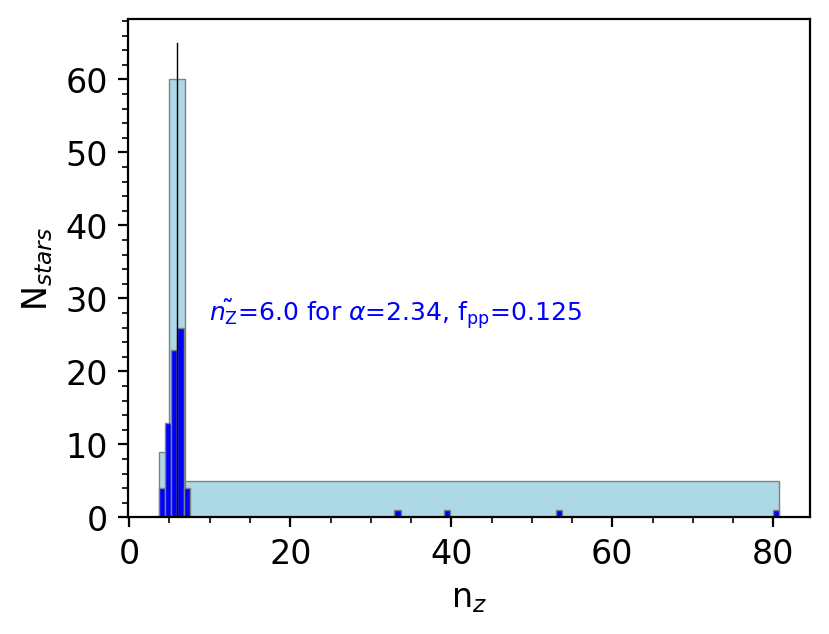

In [43]:
from astropy.visualization import hist
plt.figure(figsize=[4.4,3.3],dpi=200)
hist1=hist(nz_detectionNZFin,bins='blocks',linewidth=".5",histtype='bar',ec='gray',
           color="lightblue",\
          )
plt.plot([np.nanmedian(nz_detectionNZFin),np.nanmedian(nz_detectionNZFin)],
         [0,hist1[0].max()+5],
        color="black",#label="Outer HZ"
         linewidth=0.5
        )


hist1=hist(nz_detectionNZFin,linewidth=".5",histtype='bar',ec='gray',
           color="blue",bins=100,
          )

#plt.ylim([0,hist1[0].max()+15])
plt.text((np.nanmedian(nz_detectionNZFin))+4, hist1[0].max()+1,
         str(r"$\tilde{n_{\rm Z}}$=%.1f"%(np.nanmedian(nz_detectionNZFin))
             +r" for $\alpha$="+str(alphaZ))+r", f$_{\rm pp}$=%.3f "%(f_pp),
         fontsize=9,color="blue", )


         #" \n $n_{sys}$=%.1i"%(nz_critOuterFin.size)
         



plt.xlabel("n$_{z}$")
#plt.legend()
#plt.xlim([0,200])
#plt.xscale('symlog', linthreshy=2000)
plt.ylabel("N$_{stars}$")
plt.minorticks_on()
plt.savefig(outdir+"sensitivity_%isigma"%(SNR)
            +str(alphaZ).replace(".","_")+"alpha"
            +mode["systName"]+".pdf",
            bbox_inches="tight")
#hist1[0].sum(),hist2[0].sum()



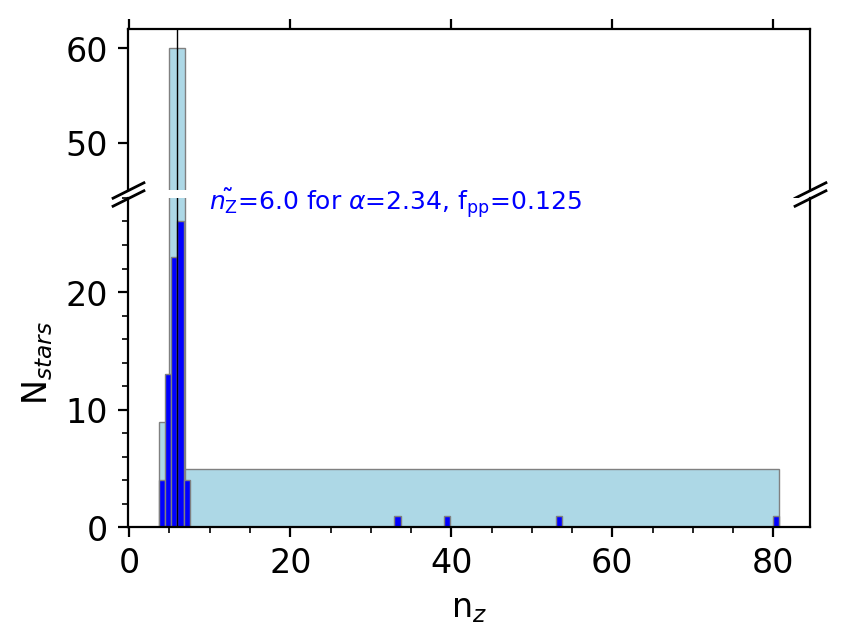

In [44]:
from astropy.visualization import hist
# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax1) for the outliers, and the bottom
# (ax2) for the details of the majority of our data

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize=[4.4,3.3],dpi=200)

ax1 = plt.subplot2grid((3, 1), (0, 0))
ax2 = plt.subplot2grid((3, 1), (1, 0),rowspan=2)

fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes



hist1=hist(nz_detectionNZFin,bins='blocks',linewidth=".5",histtype='bar',ec='gray',
           color="lightblue",ax=ax1,
          )

hist1=hist(nz_detectionNZFin,bins='blocks',linewidth=".5",histtype='bar',ec='gray',
           color="lightblue",ax=ax2,
          )

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(45, hist1[0].max()+2)  # outliers only
ax2.set_ylim(0,28 )  # most of the data

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)



ax1.plot([np.nanmedian(nz_detectionNZFin),np.nanmedian(nz_detectionNZFin)],
         [0,hist1[0].max()+5],
        color="black",#label="Outer HZ"
         linewidth=0.5
        )

ax2.plot([np.nanmedian(nz_detectionNZFin),np.nanmedian(nz_detectionNZFin)],
         [0,hist1[0].max()+5],
        color="black",#label="Outer HZ"
         linewidth=0.5
        )



hist1=hist(nz_detectionNZFin,linewidth=".5",histtype='bar',ec='gray',
           color="blue",bins=100,
          )

ax2.text((np.nanmedian(nz_detectionNZFin))+4, hist1[0].max()+1,
         str(r"$\tilde{n_{\rm Z}}$=%.1f"%(np.nanmedian(nz_detectionNZFin))
             +r" for $\alpha$="+str(alphaZ))+r", f$_{\rm pp}$=%.3f "%(f_pp),
         fontsize=9,color="blue", )


         #" \n $n_{sys}$=%.1i"%(nz_critOuterFin.size)
         



plt.xlabel("n$_{z}$")
#plt.legend()
#plt.xlim([0,200])
#plt.xscale('symlog', linthreshy=2000)
plt.ylabel("N$_{stars}$")
plt.minorticks_on()
plt.savefig(outdir+"sensitivity_%isigma"%(SNR)
            +str(alphaZ).replace(".","_")+"alpha"
            +mode["systName"]+"split.pdf",
            bbox_inches="tight")
#hist1[0].sum(),hist2[0].sum()



In [45]:
np.shape(nz_detectionNZFin>0)

(74,)

##### 

In [46]:
np.size(nz_detectionNZFin>0)

74

In [47]:
countsNez=detectionNZ*extraOuter["C_ez"]

<Quantity [0.00959294, 0.00317824, 0.00344466, 0.00221939, 0.00818818,
           0.00833262] 1 / s>

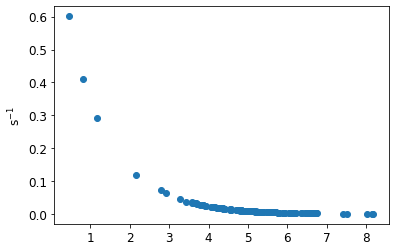

In [48]:
plt.scatter(TL.Vmag,extraIWA["C_sr"],)
extraIWA["C_ez"][TL.Vmag<3]

['HIP 37279' 'HIP 97649' 'HIP 113368' 'HIP 57632']


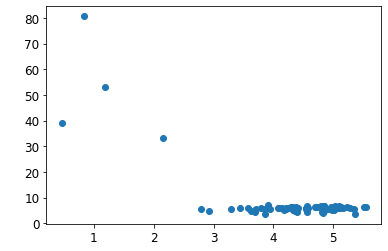

In [49]:
plt.scatter(TL.Vmag , detectionNZ)
print(TL.Name[TL.Vmag<2.5])

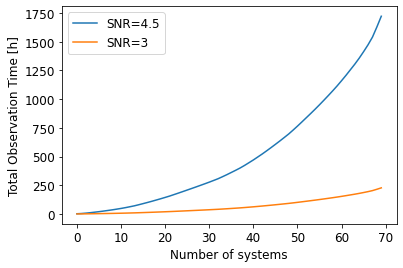

In [50]:
exp_SNR=4.5

#                intTime = np.true_divide(SNR**2.*C_b, (C_p**2. - (SNR*C_sp)**2.))
intTime = np.true_divide(exp_SNR**2.*cbIWA,((countsNez)**2. - (f_pp*exp_SNR*extraIWA["C_sr"])**2.)).to(u.hour)
#plt.plot(intTime)
sel=np.where((outerHZs>mode[ 'IWA'])&(intTime>0))
plt.plot(range(intTime[sel].size),np.cumsum(np.sort(intTime[sel],)),
         label="SNR=%.3g"%exp_SNR)
#plt.plot(extraOuter["C_ez"]/extraOuter["C_sr"])
exp_SNR=3

#                intTime = np.true_divide(SNR**2.*C_b, (C_p**2. - (SNR*C_sp)**2.))
intTime = np.true_divide(exp_SNR**2.*cbIWA,((countsNez)**2. - (f_pp*exp_SNR*extraIWA["C_sr"])**2.)).to(u.hour)
#plt.plot(intTime)
sel=np.where((outerHZs>mode[ 'IWA'])&(intTime>0))
plt.plot(range(intTime[sel].size),np.cumsum(np.sort(intTime[sel],)),
         label="SNR=%.3g"%exp_SNR)
#plt.plot(extraOuter["C_ez"]/extraOuter["C_sr"])
plt.xlabel("Number of systems")
plt.legend()
plt.ylabel("Total Observation Time ["+str(intTime.unit)+"]")
plt.savefig(outdir+"exptime"+mode["systName"]+".pdf",bbox_inches="tight")


In [51]:
r"$\tilde{Z}$=%.1f"%(np.nanmedian(nz_detectionNZFin))+" for $\alpha$="+str(alphaZ)



'$\\tilde{Z}$=6.0 for $\x07lpha$=2.34'

In [52]:
#-TL.starMag(allstars, mode["lam"])
#print(extraOuter["C_sr"][ref_star],extraOuter["C_ez"][ref_star])#77
#spot checks
ref_star=[TL.Name=="HIP 8102"]
print("signal rate"+str(extraIWA["C_ez"][ref_star]*10))#77

print("raw speckle rate w/o post processing: "+str(extraIWA["C_sr"][ref_star]))

print("critical_n zodi w/f_pp:"+str(csp[ref_star]/(extraIWA["C_ez"][ref_star])*5))
print("nzcrit {}".format(detectionNZ[ref_star]))


print("speckle rate post processed: "+str(csp[ref_star]))

print("raw background rate : "+str(cb[ref_star]))
print("IWA AU {}".format(IWA_AU[ref_star]))
print("d [pc]{}".format(TL.dist[ref_star]))
print("V-mag{}".format(TL.Vmag[ref_star]))

signal rate[0.04416409] 1 / s
raw speckle rate w/o post processing: [0.03477998] 1 / s
critical_n zodi w/f_pp:[4.92198219]
nzcrit [4.92198219]
speckle rate post processed: [0.0043475] 1 / s
raw background rate : [0.07287282] 1 / s
IWA AU [0.61242478] AU
d [pc][3.65016794] pc
V-mag[3.6295]


/Users/edouglas/anaconda3/envs/python39/lib/python3.9/site-packages/astropy/units/quantity.py:1039: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = super().__getitem__(key)
<ipython-input-52-c492079d4cac>:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  print("V-mag{}".format(TL.Vmag[ref_star]))


In [53]:
np.savetxt(outdir+"HIP_names.txt", HIP, fmt='%i,',delimiter=",")

## 